<a href="https://colab.research.google.com/github/Nniikkoollaass/data-science-modul-9-HW/blob/main/DS_HW_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1

​

У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

In [2]:
pip install kneed

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

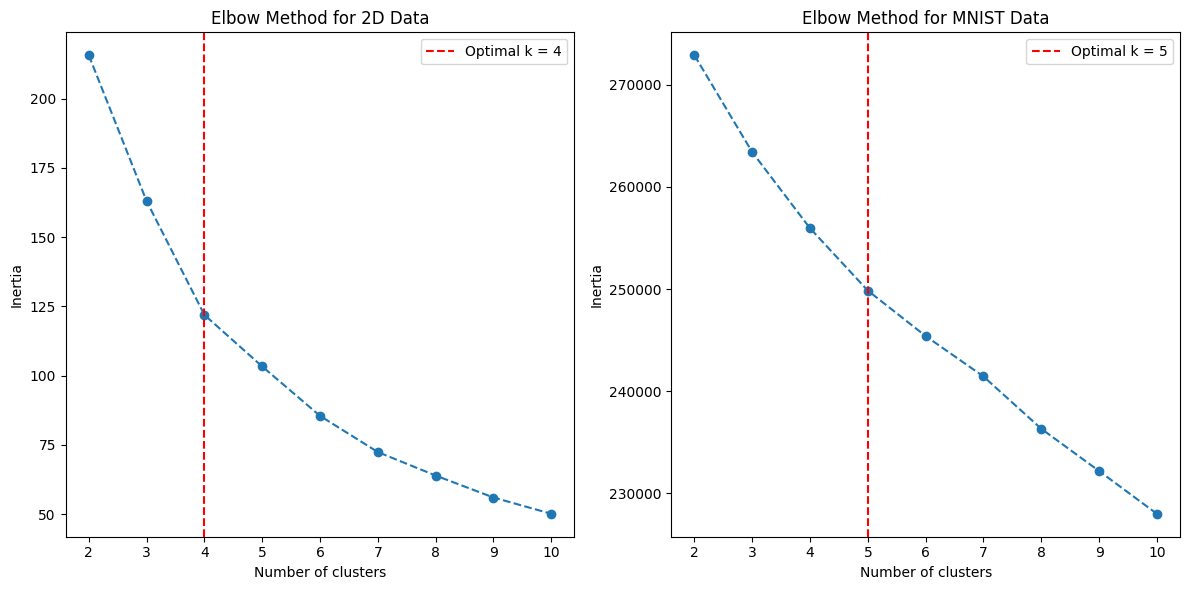

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels for 2D data: [3 1 1 1 3 3 1 1 1 1 1 3 3 1 1 1 3 3 1 1 1 1 3 3 1 1 3 3 1 1 1 3 1 1 3 1 3
 3 1 1 3 1 3 1 1 1 1 3 3 3 3 1 3 3 1 3 3 3 3 1 1 1 1 1 1 3 3 1 3 1 3 3 1 1
 3 1 3 1 1 3 1 3 1 1 1 3 1 3 1 1 1 3 1 1 1 1 3 3 3 0 0 0 2 2 0 0 0 0 0 0 0
 2 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 2 2 2 0 0 0 0 2 2 0 0 0 2 2 0 0 2 0 0 2 0
 2 0 0 2 0 0 0 0 0 2 2 2 2 2 2 0 0 2 2 2 2 2 0 0 2 2 0 2 0 0 0 2 0 0 2 2 0
 0 0 0 2 0 0 0 0 0 2 2 2 0 0]
Cluster labels for MNIST data: [1 2 1 0 2 0 0 3 3 4 4 0 4 2 1 0 0 4 0 3 1 1 3 0 4 0 0 3 2 3 2 3 4 3 1 0 2
 1 2 2 0 0 2 2 3 2 1 0 0 1 4 3 3 4 3 0 2 0 2 0 1 0 1 3 2 1 0 3 4 0 4 1 3 2
 0 3 0 2 3 0 1 1 0 3 0 2 3 1 2 3 1 2 3 2 0 2 2 1 0 1 4 3 0 0 0 1 2 0 0 3 2
 2 0 2 2 0 0 0 0 3 1 0 1 0 0 4 3 3 3 1 1 3 0 3 2 1 2 1 0 1 0 3 2 0 2 3 1 1
 1 0 0 3 3 2 3 1 1 1 2 0 1 3 0 1 1 0 2 2 0 0 3 1 3 1 2 2 3 2 3 2 1 3 4 1 0
 1 3 4 2 2 2 1 0 3 2 2 1 0 1 1 4 2 2 2 2 0 3 1 0 0 3 0 2 0 1 3 3 2 3 0 1 4
 0 2 1 3 2 2 2 1 2 1 0 2 0 1 1 0 2 3 0 3 0 2 4 4 1 0 1 0 2 0 3 0 0 1 2 1 4
 3 2 0 0 0 

In [5]:
# Завантаження даних
data_2d = pd.read_csv('data/data_2d.csv')
mnist = pd.read_csv('data/mnist.csv')

# Попередня обробка даних (якщо потрібно)
# Нормалізація даних
scaler = StandardScaler()
data_2d_normalized = scaler.fit_transform(data_2d)
mnist_normalized = scaler.fit_transform(mnist)

# Використання ліктевого методу для визначення оптимальної кількості кластерів
def find_optimal_clusters(data, max_k):
    inertias = []
    silhouettes = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
        silhouettes.append(silhouette_score(data, kmeans.labels_))

    # Визначення оптимальної кількості кластерів за допомогою ліктя та силуетного коефіцієнта
    kl = KneeLocator(range(2, max_k + 1), inertias, curve="convex", direction="decreasing")
    optimal_k = kl.elbow

    return optimal_k, inertias, silhouettes

# Застосування ліктевого методу до даних
optimal_k_2d, inertias_2d, silhouettes_2d = find_optimal_clusters(data_2d_normalized, max_k=10)
optimal_k_mnist, inertias_mnist, silhouettes_mnist = find_optimal_clusters(mnist_normalized, max_k=10)

# Візуалізація результатів
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertias_2d, marker='o', linestyle='--')
plt.title('Elbow Method for 2D Data')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.axvline(x=optimal_k_2d, color='r', linestyle='--', label=f'Optimal k = {optimal_k_2d}')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), inertias_mnist, marker='o', linestyle='--')
plt.title('Elbow Method for MNIST Data')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.axvline(x=optimal_k_mnist, color='r', linestyle='--', label=f'Optimal k = {optimal_k_mnist}')
plt.legend()

plt.tight_layout()
plt.show()

# Подальша кластеризація з оптимальною кількістю кластерів
kmeans_2d = KMeans(n_clusters=optimal_k_2d, random_state=42)
kmeans_2d.fit(data_2d_normalized)

kmeans_mnist = KMeans(n_clusters=optimal_k_mnist, random_state=42)
kmeans_mnist.fit(mnist_normalized)

# Отримання міток кластерів для кожного зразка
labels_2d = kmeans_2d.labels_
labels_mnist = kmeans_mnist.labels_

# Виведення результатів кластеризації
print("Cluster labels for 2D data:", labels_2d)
print("Cluster labels for MNIST data:", labels_mnist)


Завдання 2

​

Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

In [12]:
from sklearn.decomposition import PCA

     0.000000000000000000e+00  -7.687164597386728637e-01  \
0                         0.0                   2.687848   
1                         0.0                  -0.201379   
2                         0.0                   0.608496   
3                         0.0                  -0.082282   
4                         0.0                   2.083069   
..                        ...                        ...   
194                       1.0                   0.629144   
195                       1.0                  -0.723824   
196                       1.0                   1.346107   
197                       1.0                   3.608219   
198                       1.0                   3.764228   

     4.608603078297135447e-01  
0                    2.366961  
1                    0.470430  
2                    1.225400  
3                    1.137218  
4                    2.694482  
..                        ...  
194                  4.378584  
195                  5.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


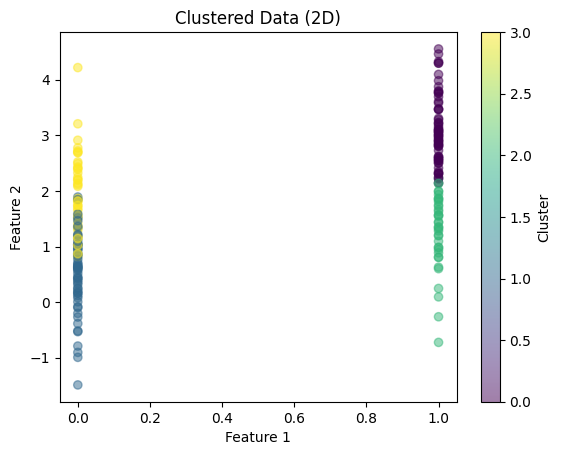

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


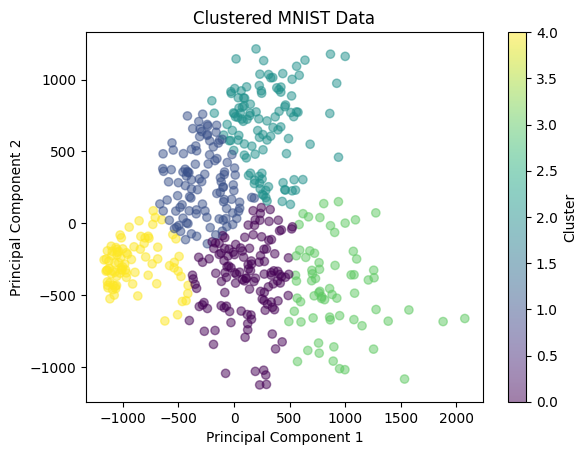

In [13]:
# Завантаження та обробка даних
data_2d = pd.read_csv('data/data_2d.csv')
mnist = pd.read_csv('data/mnist.csv')

print(data_2d)

scaler = StandardScaler()
data_2d_normalized = scaler.fit_transform(data_2d)

# Використання K-means для кластеризації даних
kmeans_2d = KMeans(n_clusters=optimal_k_2d, random_state=42)
kmeans_2d.fit(data_2d_normalized)

# Визначення кластерів для 2D даних
labels_2d = kmeans_2d.labels_

# Визуалізація кластерів для 2D даних
plt.scatter(data_2d.iloc[:, 0], data_2d.iloc[:, 1], c=labels_2d, cmap='viridis', alpha=0.5)
plt.title('Clustered Data (2D)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

# Зменшення розмірності даних mnist до 2 вимірів за допомогою PCA
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist)

# Використання K-means для кластеризації даних mnist
kmeans_mnist = KMeans(n_clusters=optimal_k_mnist, random_state=42)
kmeans_mnist.fit(mnist_pca)

# Визначення кластерів для даних mnist
labels_mnist = kmeans_mnist.labels_

# Визуалізація кластерів для даних mnist
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=labels_mnist, cmap='viridis', alpha=0.5)
plt.title('Clustered MNIST Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
